<a href="https://colab.research.google.com/github/Sudecon5/Projects_New-/blob/main/MonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#Upload file path and read csv
filepath ='/all_stocks_5yr.csv'
df = pd.read_csv(filepath, parse_dates = True, index_col='date')

#Show the data
df

FileNotFoundError: [Errno 2] No such file or directory: '/all_stocks_5yr.csv'

In [ ]:
### Simulate future path###

#Simulation parameters
num_simulations= 10
forecast_days=365

#initialise the simulation array with all zeros
simulations = np.zeros((num_simulations,forecast_days))

#Get the close price
last_price =df['close'].iloc[-1]

#Calculate the daily returns and drop & remove any NA values
daily_returns = df['close'].pct_change().dropna()


In [ ]:
#Loop through the number of simulations to forecast future cumulative returns for assets
for i in range(num_simulations):
  #Get random daily returns of size forecast days and return its cumulative return
  #Get an array of size forecast_days that contains randomly selected daily returns and calculate the cumulative return
  cumulative_returns = np.random.choice(daily_returns, size= forecast_days, replace=True).cumsum()
  #Get the simulations with the random cumulative returns
  simulations[i,:] =last_price* ( 1 +cumulative_returns)
  print(simulations)


[[72.64366123 72.948277   73.05806889 ... 55.96782607 57.39444591
  57.18650672]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
[[72.64366123 72.948277   73.05806889 ... 55.96782607 57.39444591
  57.18650672]
 [72.98767433 73.38628913 74.35821943 ... 79.79479272 81.26355823
  80.74550212]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
[[72.64366123 72.948277   73.05806889 ... 55.96782607 57.39444591
  57.18650672]
 [72.98

In [ ]:
#For simulation '3' show the first 4 random cumulative returns out of the 365 random cumulative returns starting from index 0 and not inclusing 4
print(simulations[2,0:4])

[73.44804555 72.39932344 71.16737579 71.77195969]


In [1]:
#Plot the result
plt.figure(figsize =(10,6))
plt.plot(simulations.T, color= 'green', alpha =0.25)
plt.title('Monte Carlo Simulation of Various Stocks over 5 Years')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()


NameError: name 'plt' is not defined

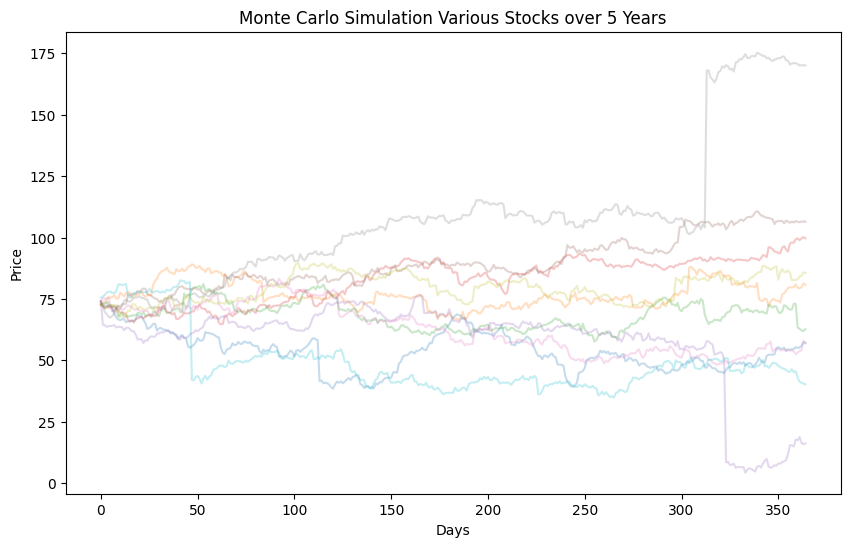

In [ ]:
#Plot the result
plt.figure(figsize =(10,6))
for i in range(num_simulations):
  plt.plot(simulations[i], alpha =0.25)
plt.title('Monte Carlo Simulation Various Stocks over 5 Years')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()
